# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

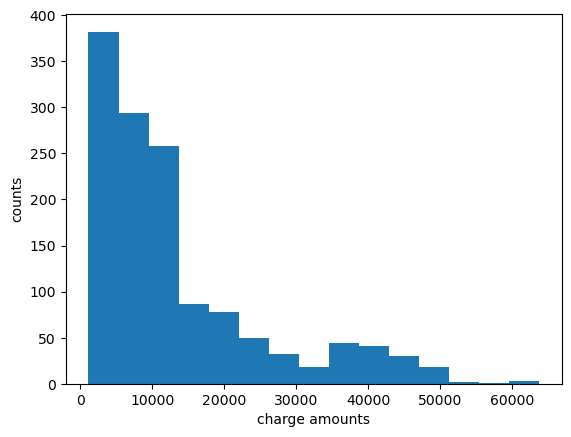

In [4]:
plt.hist(medical['charges'], bins = 15)
plt.xlabel('charge amounts')
plt.ylabel('counts')

plt.show()

In [5]:
charge_mean = np.mean(medical['charges'])
charge_stdev = np.std(medical['charges'])

print (charge_mean)
print (charge_stdev)

### seems like there may be seem outliers that are throwing off the mean and the standard deviation, probably best to use the median

13270.422265141257
12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__I would quell anxieties by saying that this is just a sample distribution, and many many distributions would need to be averaged in order to get a more data-bolstered mean that is reflective of the actual fiscal scene at the hospital

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [6]:
#standard error

st_error = charge_stdev/np.sqrt(len(medical['charges']))

##95 % confidence interval

margin = st_error * 1.96

lower = charge_mean - margin

higher  = charge_mean + margin


print ('The 95% interval for this mean is:', lower, 'to', higher)

The 95% interval for this mean is: 12621.772585885332 to 13919.071944397181


In [7]:
## this would be a two-sided interval because we want to find the confidence of means adjacent the mean generated with this sample

In [8]:
### I would comment that there should be some concern with this mean because there is a high confidence that the true mean could be less than $750 from $12.000, so all of the population must be examined in order to get the truest mean

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

Null Hypothesis: there is no difference in the charge for people with or without insurance.  
Alternative Hypothesis: there is a difference in the charge for those with and without insurance

By using a t test statistic testing the variance between the means of those insured versus those who are not, we are assuming that the individual sample sizes of those two groups are large enough to confidently produce the most accurate mean.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [9]:
##subset the groups of with and without insurance

subset_insurance = medical[medical['insuranceclaim'] == 1]

subset_no_insurance = medical[medical['insuranceclaim'] == 0]


In [10]:
## t test without scipy

n1 = len(subset_insurance['charges'])
x1 = np.mean(subset_insurance['charges'])
s1 = np.std(subset_insurance['charges'])

n0 = len(subset_no_insurance['charges'])
x0 = np.mean(subset_no_insurance['charges'])
s0 = np.std(subset_no_insurance['charges'])

numer_sp = ((n0 -1)*s0**2) +((n1-1)*s1**2)
denom_sp = n0 + n1 -2

sp = np.sqrt(numer_sp/denom_sp)

numer_t = (x0-x1)
denom_t = sp*np.sqrt((1/n0)+(1/n1))

t_manual = numer_t/denom_t
print (t_manual)

##now p value time-- see how

charge_mean = np.mean(medical['charges'])
charge_stdev = np.std(medical['charges'])

cdf = t.cdf(t_manual, charge_mean, charge_stdev)

print (cdf)

-11.90130694355539
0.0


In [11]:
## t test with scipy using the ttest_ind_from_stats

t_sci = scipy.stats.ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)

print (t_sci)



Ttest_indResult(statistic=-11.901306943555392, pvalue=4.090550214373386e-31)


In [15]:
### the t test numbers are the same! and the p value is practically 0

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

In [ ]:
help(scipy.stats

__A:__  I do not see an obvious equivalent for a z-test, but there is the z-score method which can be used to delineate the z score of a value.  I assume that because the z score and test are so closely related to the standard deviation calculation and relative values, that it may have been viewed as less necessary to add a sophisticated method for the z test in scipy.


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test